                    ID         0         1         2         3         4  \
0  206054070144_R04C01 -0.330207 -0.557249 -0.608832 -0.531067 -0.512700   
1  207343240049_R06C01  0.704176  0.584055  0.599241  0.558390  0.601519   
2  203273200231_R06C01 -0.364528 -0.418004 -0.465241 -0.396168 -0.364973   
3  205041760139_R08C01  0.266603  0.229097  0.190874  0.200908  0.188247   
4  205617070063_R08C01  0.698296  0.628966  0.599589  0.635135  0.582256   

          5         6         7         8  ...      3872      3873      3874  \
0 -0.510356 -0.570926 -0.594764 -0.539664  ... -0.658070 -0.618601 -0.524033   
1  0.621868  0.547608  0.541534  0.587851  ...  0.696735  0.738193  0.706150   
2 -0.643939 -0.659091 -0.686275 -0.608734  ... -0.471034 -0.497326 -0.385918   
3  0.175108  0.133779  0.202341  0.234830  ...  0.122790  0.129240  0.182513   
4  0.636604  0.608696  0.607814  0.599589  ...  0.574031  0.622797  0.563749   

       3875      3876      3877      3878      3879      3880 

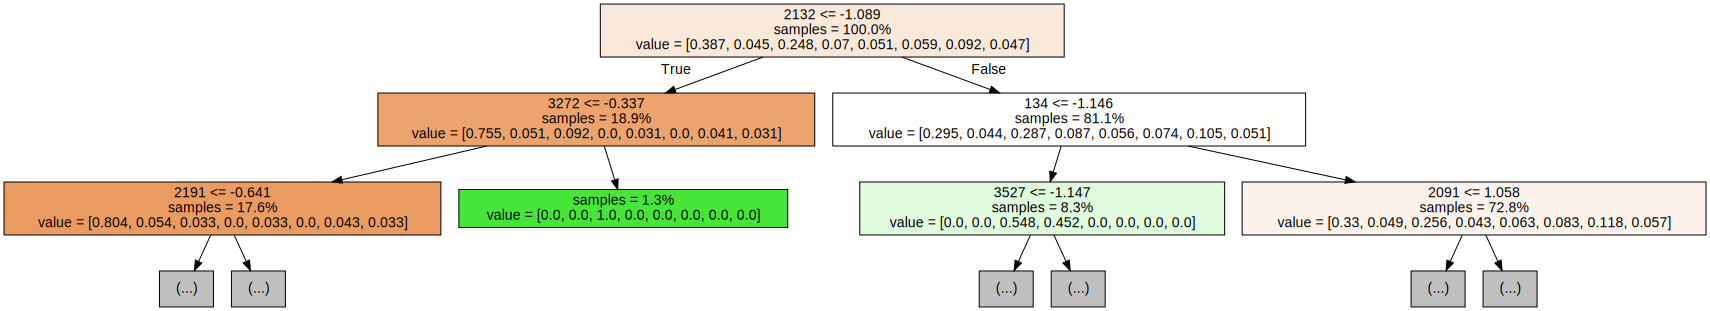

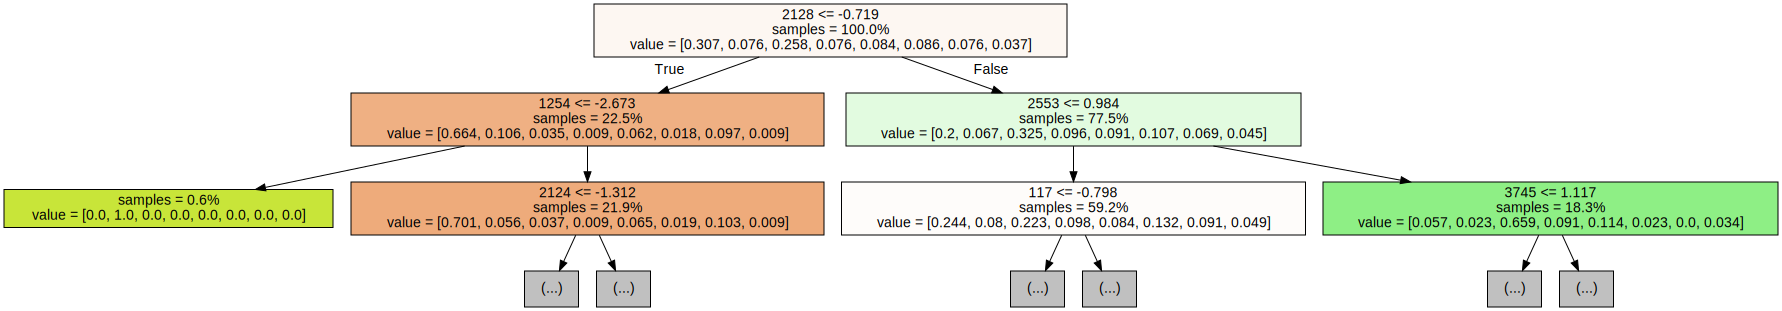

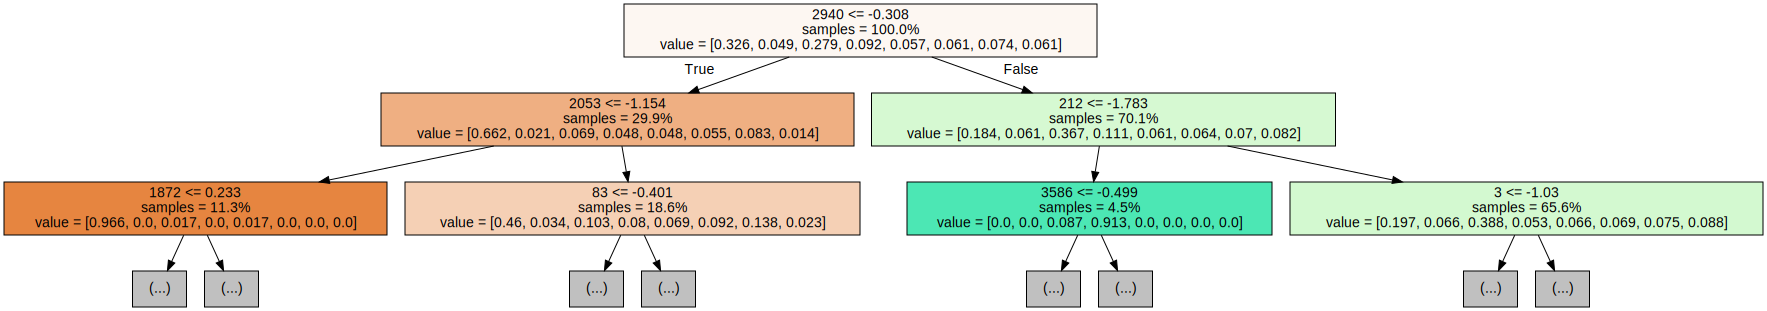

In [12]:
# Data Processing
import pandas as pd
import numpy as np


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import graphviz


df = pd.read_csv("/home/alpha/programs/python_files/datasets/cnv_and_mut/entities_transformed.csv")

print(df.head())

df = df.dropna(axis=1)
# df = df[df.columns.drop(list(df.filter(regex='[YX]')))]
X = df.drop("ID",axis=1)
X = X.drop("entity",axis=1)
y = df["entity"].map({'gbm_cnv':0,'k27_cnv':1,'mng_cnv':2,'oligo_cnv':3,'pxa_cnv':4,'astroLow_cnv':5,'astroHigh_cnv':6,'pa_cnv':7})

# Standartize data
X =( X - X.mean() ) / X.std()

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(type(X_train))

# Model fitting
rf = RandomForestClassifier(max_depth=9,n_estimators=294)
rf.fit(X_train, y_train)

# Accuracy testprint(y_pred)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Export the first three decision trees from the forest

graphviz.set_jupyter_format

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



In [4]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc231568210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc231333f10>})

In [5]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 194}


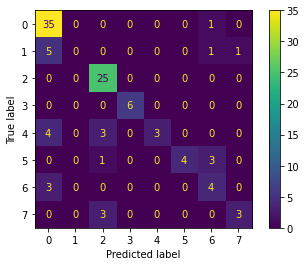

In [15]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

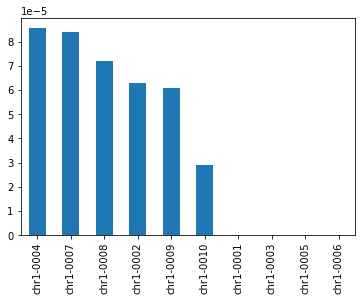

In [21]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_[:10], index=X_train.columns[:10]).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();